In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv('Salary_Data.csv')

In [102]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [103]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [104]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [106]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [107]:
df['YearsExperience'].describe()

count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: YearsExperience, dtype: float64

In [108]:
df.iloc[5:10]   #iloc = integer based location

,YearsExperience,Salary
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


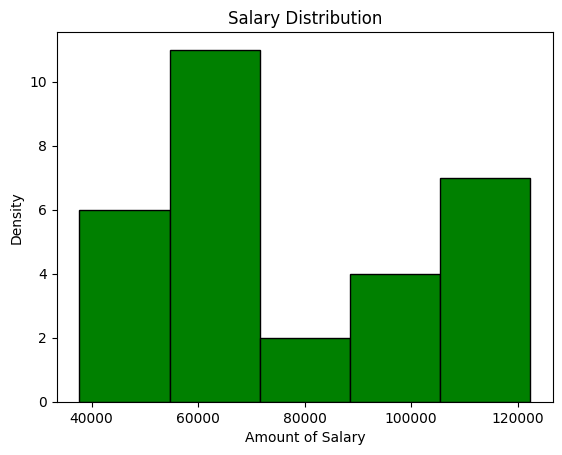

In [109]:
plt.title('Salary Distribution')
plt.xlabel('Amount of Salary')
plt.ylabel('Density')
plt.hist(df['Salary'], bins=5, edgecolor='black', color='green')
plt.show()

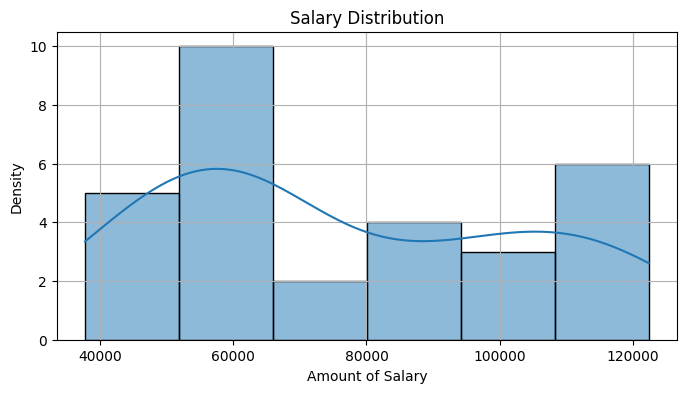

In [110]:
#Univariate Analysis (One column)
plt.figure(figsize=(8,4))          # controls figure size
plt.title('Salary Distribution')
plt.xlabel('Amount of Salary')
plt.ylabel('Density')
sns.histplot(df['Salary'], kde=True)
plt.grid(True)
plt.savefig('Salary_distribution_histogram.png')
plt.show()

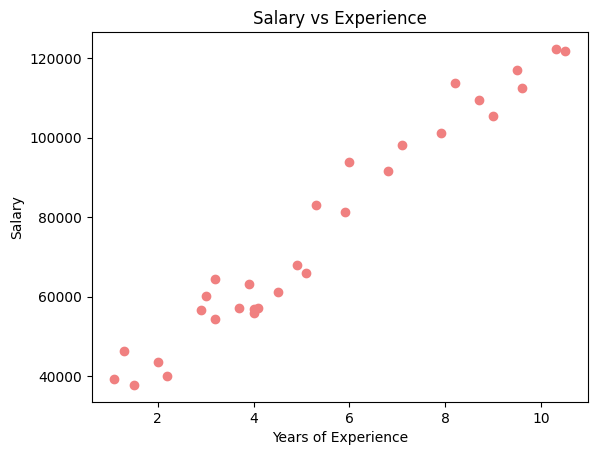

In [111]:
# Bivariate Analysis
plt.scatter(df['YearsExperience'], df['Salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

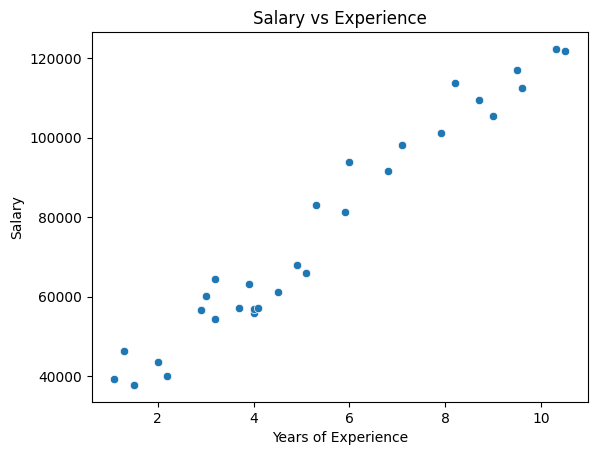

In [112]:
sns.scatterplot(data=df, x='YearsExperience', y='Salary')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [113]:
correlation = df['YearsExperience'].corr(df['Salary'])
print('correlation b/w Experience and Salary', correlation)

correlation b/w Experience and Salary 0.9782416184887599


In [114]:
# Missing vales
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [115]:
x=df.drop(columns=['Salary'])
y=df['Salary']

In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [117]:
x_train

,YearsExperience
18,5.9
12,4.0
7,3.2
27,9.6
19,6.0
23,8.2
13,4.1
29,10.5
17,5.3
15,4.9


In [118]:
y_test

6      60150.0
8      64445.0
25    105582.0
9      57189.0
1      46205.0
10     63218.0
Name: Salary, dtype: float64

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
reg=LinearRegression()

In [121]:
reg

LinearRegression()

In [122]:
reg.fit(x_train,y_train)

LinearRegression()

In [123]:
y_pred = reg.predict(x_test)

In [124]:
pd.DataFrame({'y_test':y_test, 'y_pred':y_pred,"MAE":(y_test-y_pred)})

,y_test,y_pred,MAE
6,60150.0,52370.169320,7779.830680
8,64445.0,54349.369751,10095.630249
25,105582.0,111746.182241,-6164.182241
9,57189.0,59297.370828,-2108.370828
1,46205.0,35546.965660,10658.034340
10,63218.0,61276.571259,1941.428741


In [125]:
from sklearn.metrics import mean_squared_error, r2_score

In [135]:
print('MAE = ', sum(y_test-y_pred ))
print('MSE = ', mean_squared_error(y_test, y_pred ))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred )))
print('R2 = ', r2_score(y_test, y_pred ))

MAE =  22202.370941531313
MSE =  53708787.88729128
RMSE =  7328.627967586517
R2 =  0.8451070525092712


In [127]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [129]:
reg.predict([[10]])

c:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([121642.18439408])

In [131]:
print("Intercept value: ", reg.intercept_)
print("Slope value: ", reg.coef_)
print('y = ',reg.coef_, '* X', '+', reg.intercept_)

Intercept value:  22682.16286037196
Slope value:  [9896.00215337]
y =  [9896.00215337] * X + 22682.16286037196


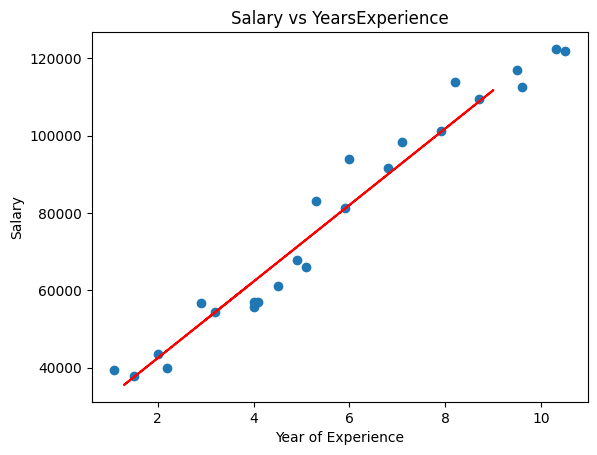

In [132]:
plt.scatter(x_train,y_train)
plt.plot(x_test,y_pred,color='r')
plt.title("Salary vs YearsExperience")
plt.xlabel("Year of Experience")
plt.ylabel("Salary")
plt.show()

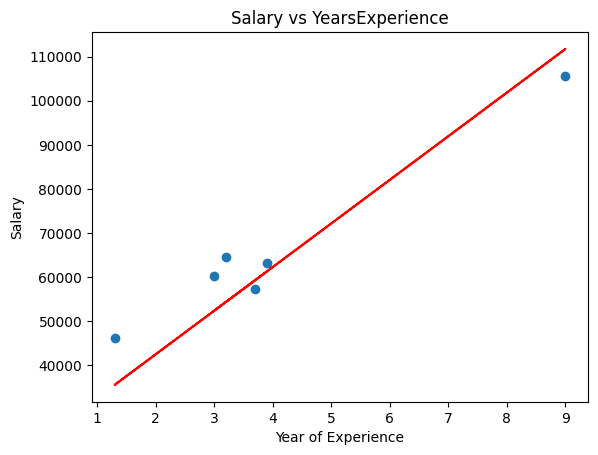

In [133]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='r')
plt.title("Salary vs YearsExperience")
plt.xlabel("Year of Experience")
plt.ylabel("Salary")
plt.show()